In [ ]:
8import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/machinelearningoncloud/data.csv")
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [ ]:
data.shape

(3649, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


Exploratory Data Analysis

In [ ]:
# from matplotlib import pyplot as plt
# data['Renewable-electricity-generating-capacity-per-capita'].plot(kind='hist', bins=20, title='Renewable-electricity-generating-capacity-per-capita')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from matplotlib import pyplot as plt
# data['Access to clean fuels for cooking'].plot(kind='hist', bins=20, title='Access to clean fuels for cooking')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from matplotlib import pyplot as plt
# data['Access to electricity (% of population)'].plot(kind='hist', bins=20, title='Access to electricity (% of population)')
# plt.gca().spines[['top', 'right',]].set_visible(False)

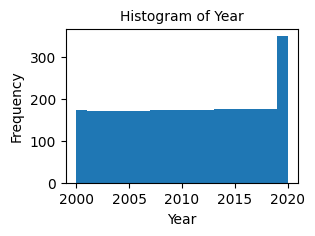

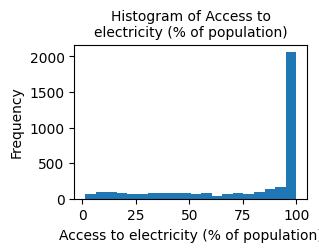

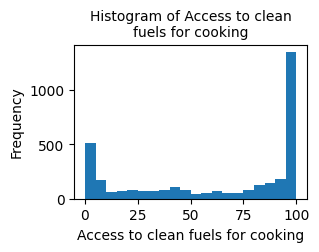

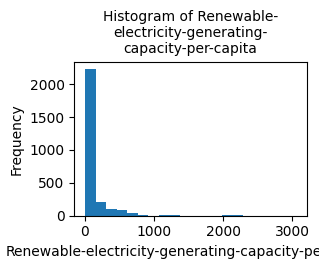

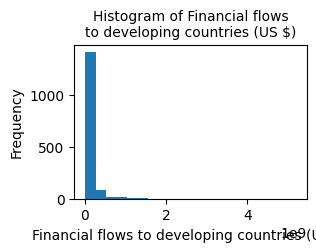

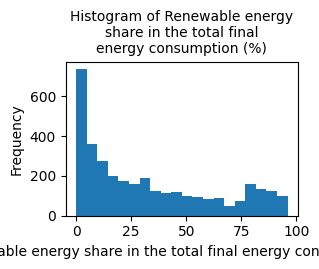

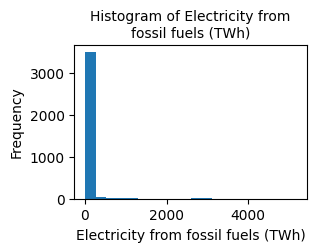

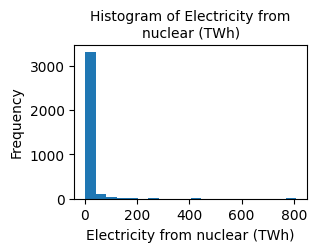

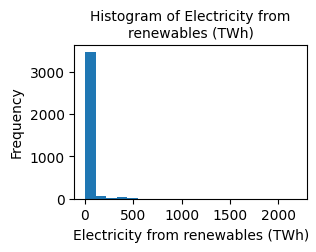

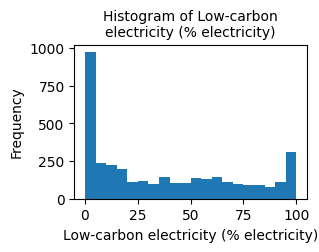

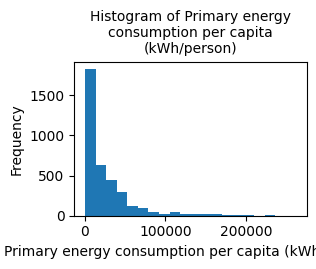

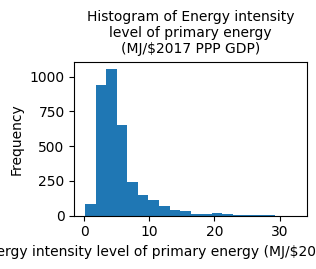

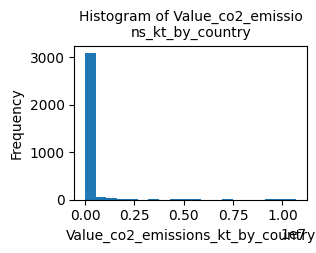

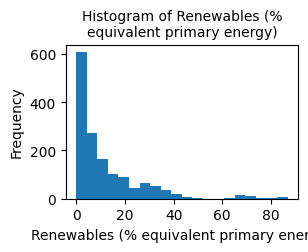

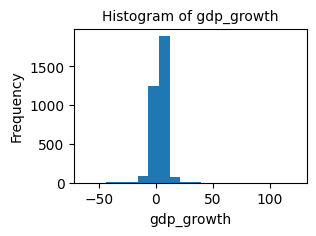

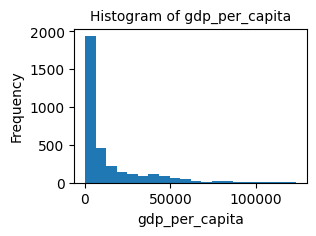

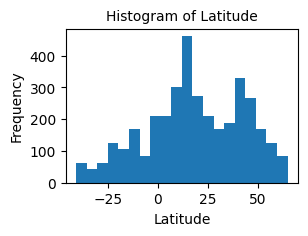

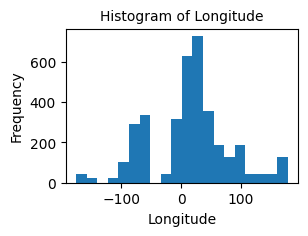

In [ ]:
import textwrap

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=['number'])


# Plot histograms for each numerical column
for column in numeric_data.columns:
    plt.figure(figsize=(3, 2))
    plt.hist(numeric_data[column], bins=20)
    wrapped_title = '\n'.join(textwrap.wrap(f'Histogram of {column}', width=30))  # Wrap the title
    plt.title(wrapped_title, fontsize=10)  # Adjust the font size here
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# # Plot bar charts for each numerical column
# for column in numeric_data.columns:
#     plt.figure(figsize=(3, 2))
#     plt.bar(data.index, data[column])
#     plt.title(f'Bar chart of {column}')
#     plt.xlabel('Index')
#     plt.ylabel(column)
#     plt.show()

# # Plot line plots for each numerical column
# for column in numeric_data.columns:
#     plt.figure(figsize=(3, 2))
#     plt.plot(data.index, data[column])
#     plt.title(f'Line plot of {column}')
#     plt.xlabel('Index')
#     plt.ylabel(column)
#     plt.show()


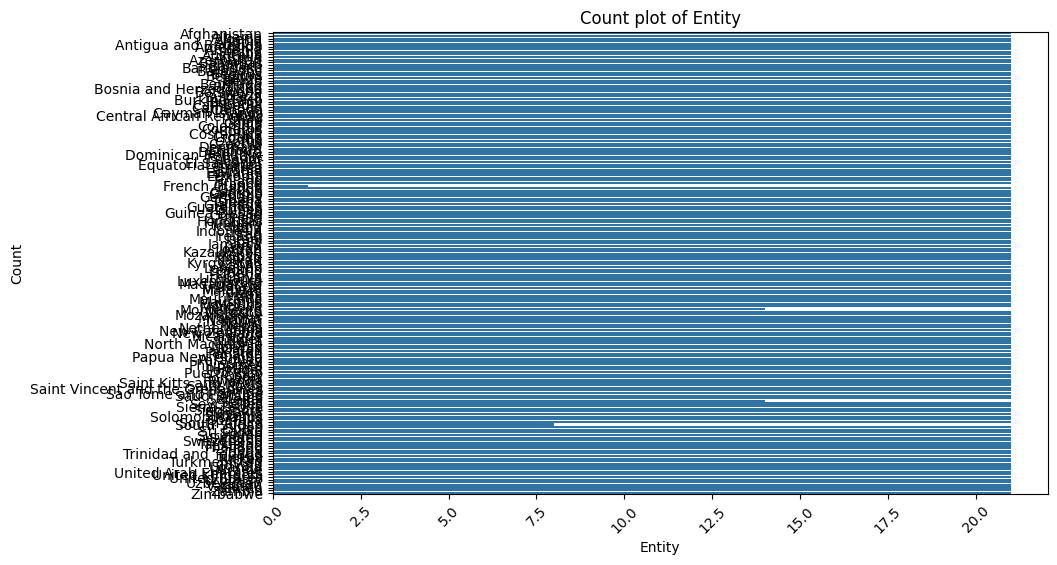

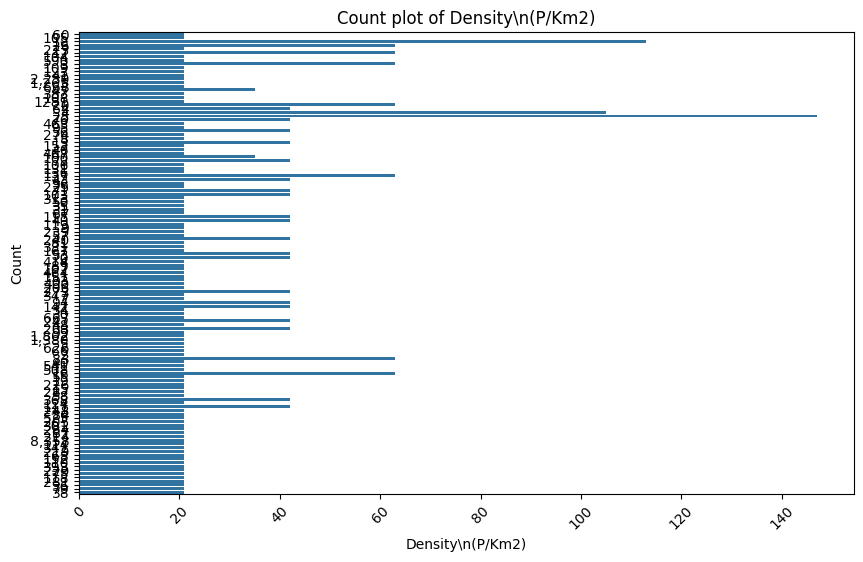

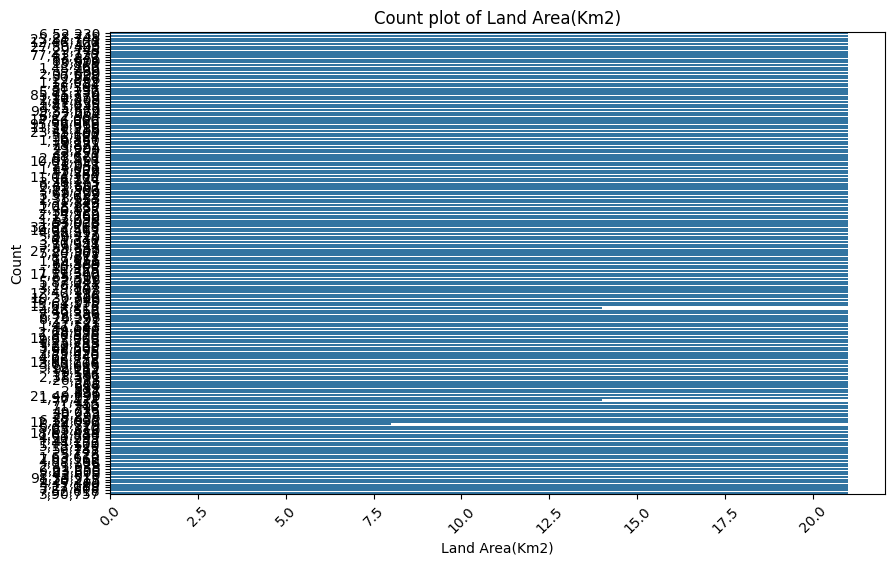

In [ ]:
categorical_data = data.select_dtypes(include=['object'])

# Plot count plots for each categorical column
for column in categorical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column])
    plt.title(f'Count plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

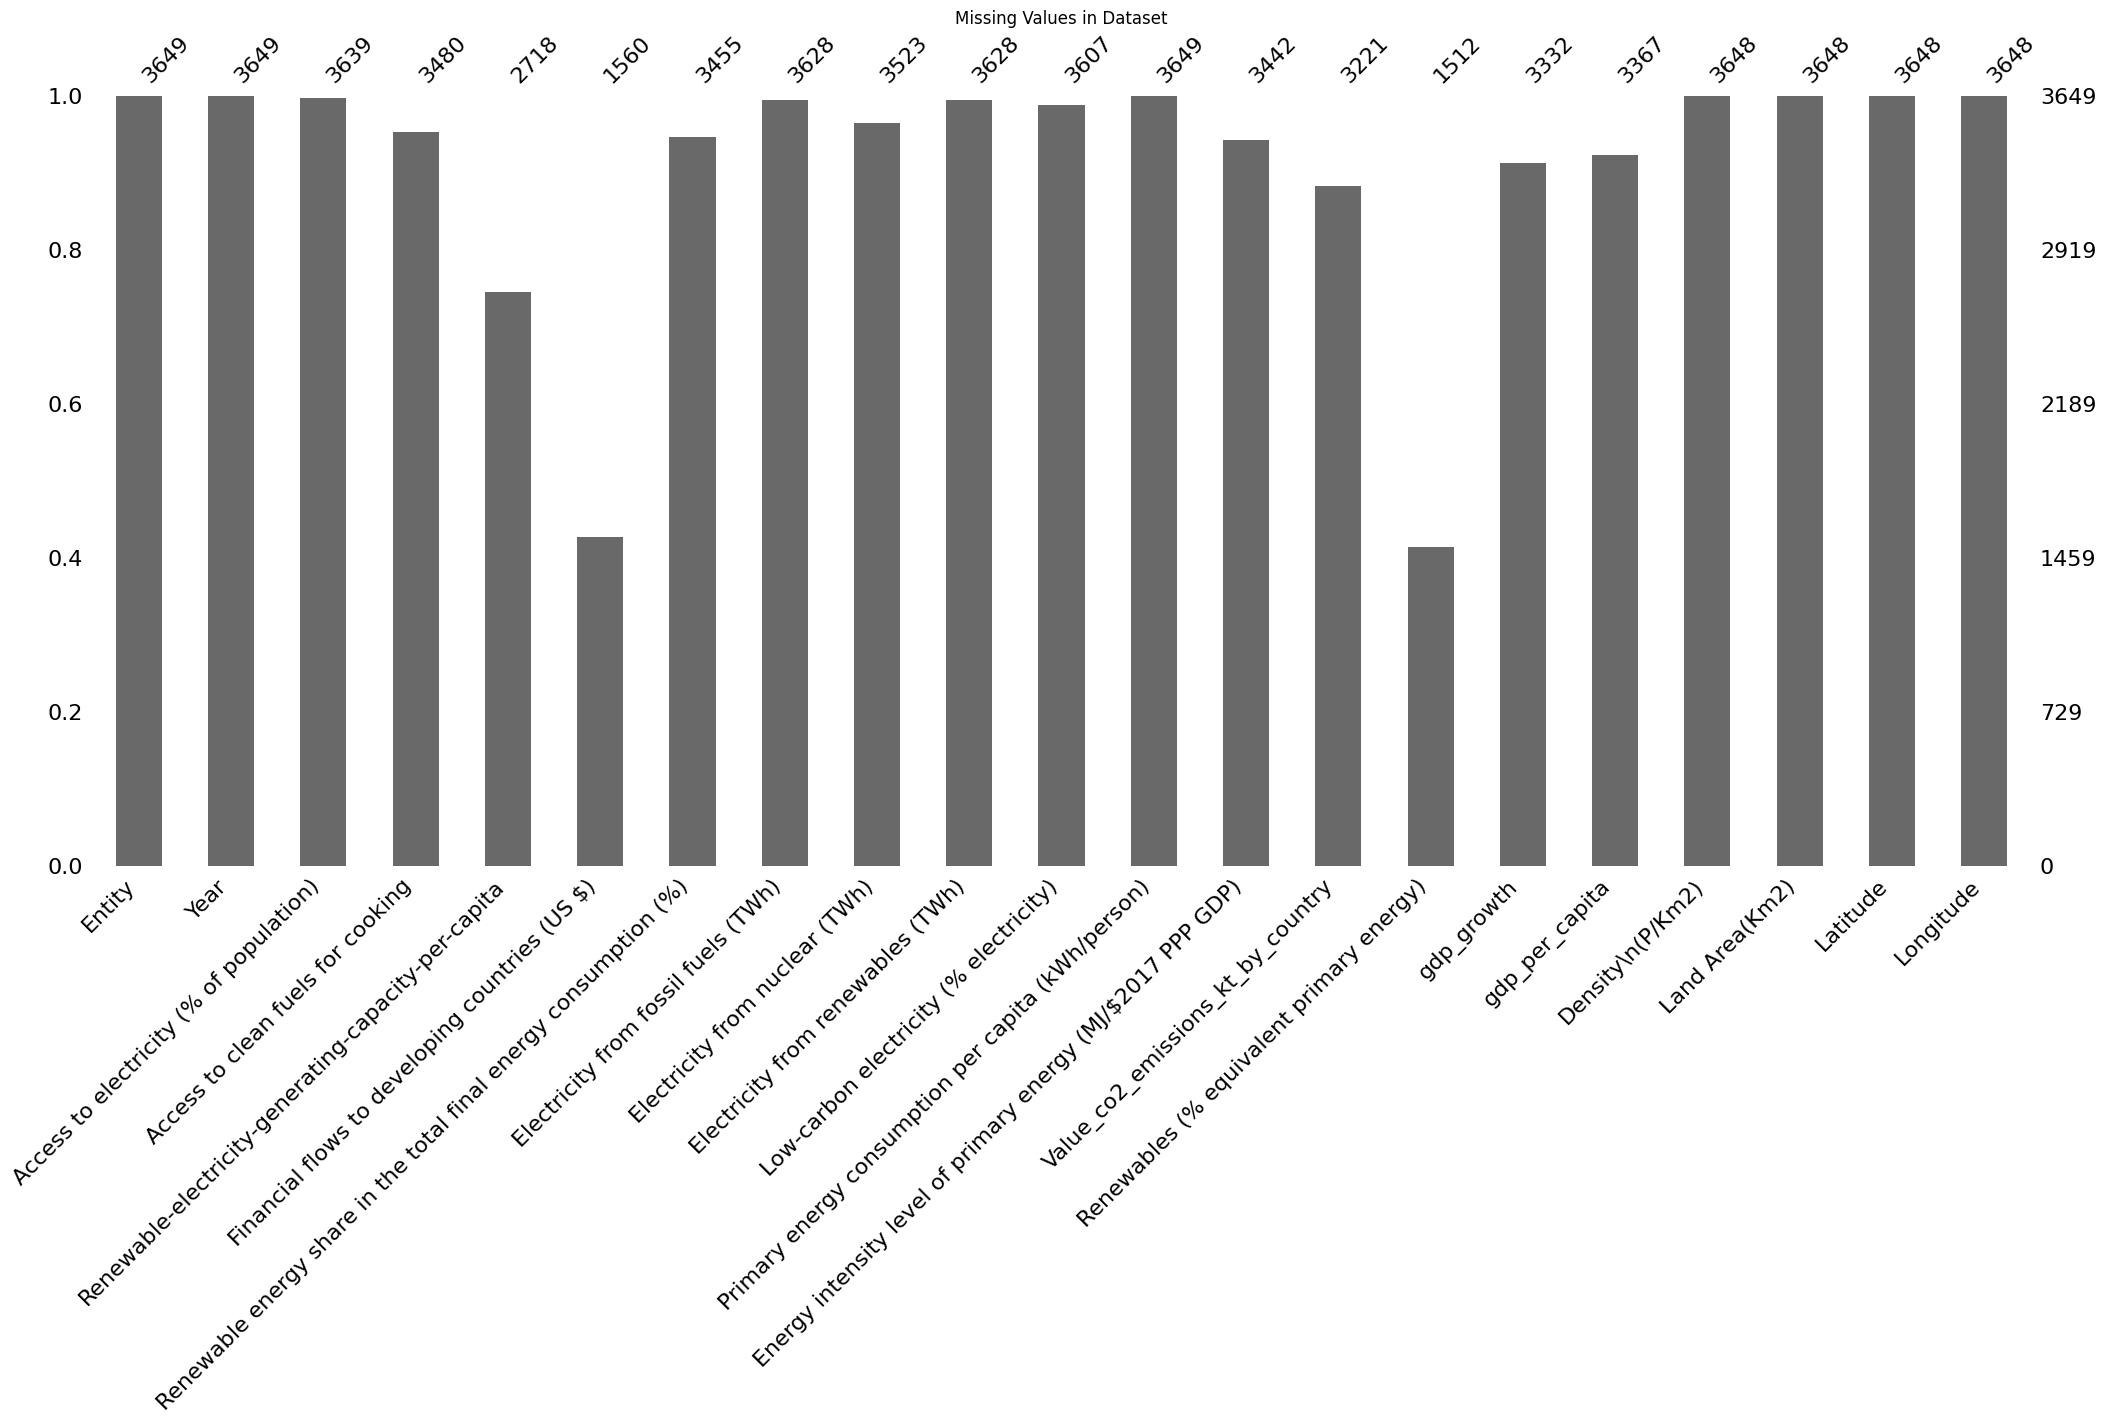

In [ ]:
import missingno as msno

# Visualize missing values
msno.bar(data)
plt.title('Missing Values in Dataset')
plt.show()


<ipython-input-132-d5756c7b5fc6>:16: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



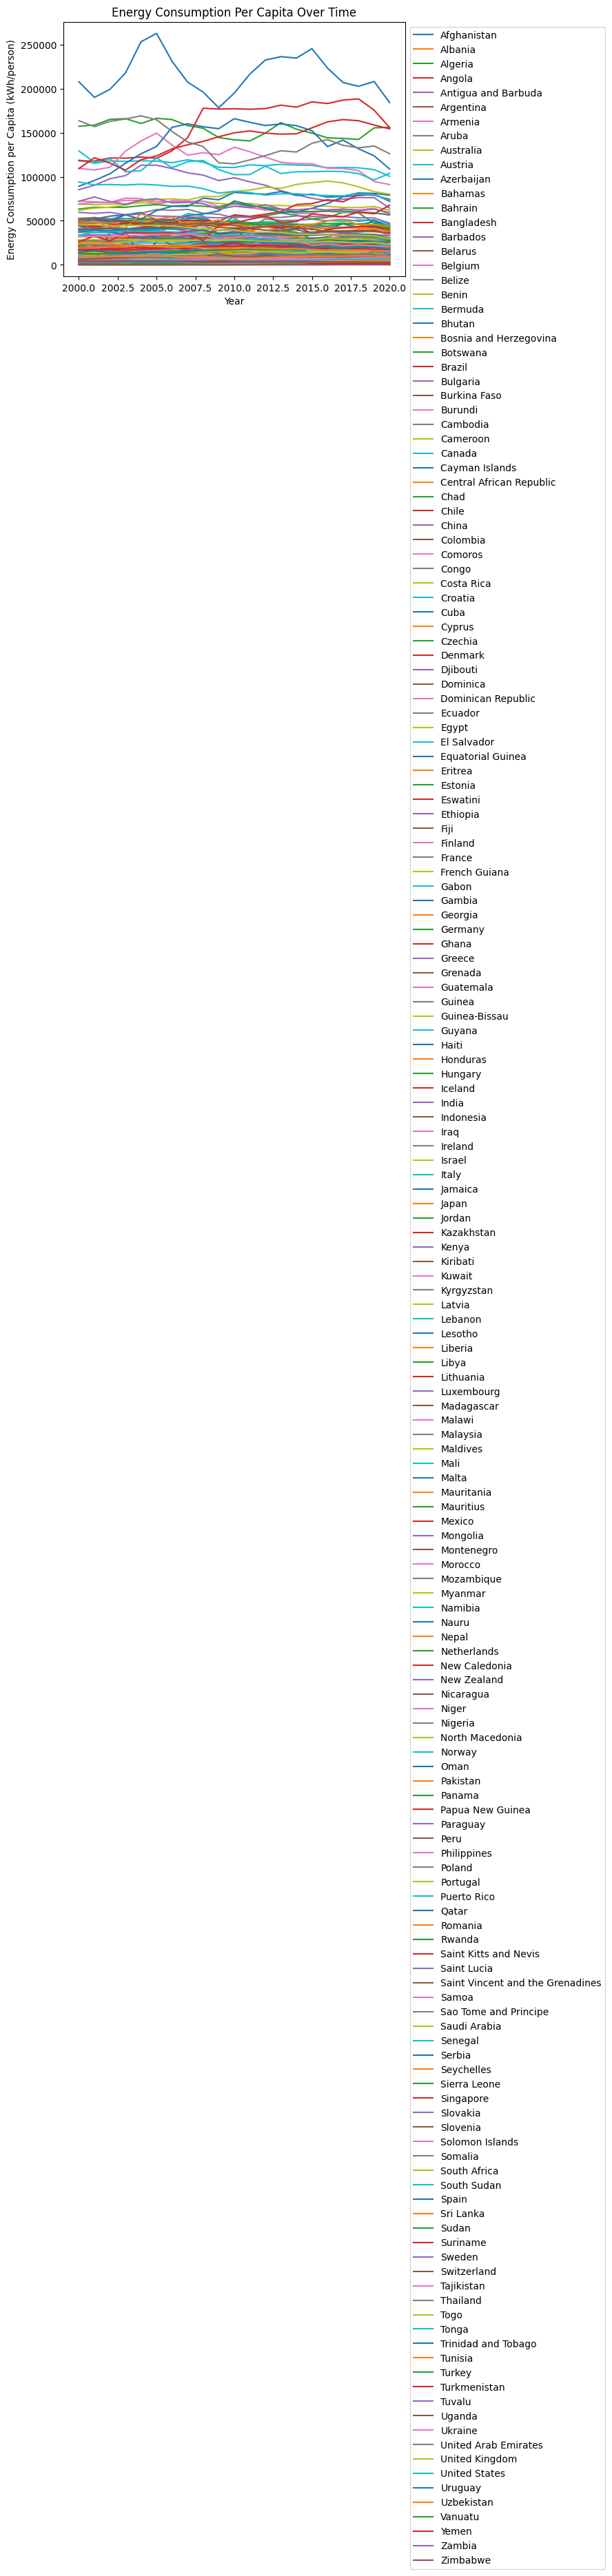

In [ ]:
# Filter out the columns needed for the plot
energy_consumption_data = data[['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']]

# Iterate over unique entities to create separate plots for each
for entity in energy_consumption_data['Entity'].unique():
    entity_data = energy_consumption_data[energy_consumption_data['Entity'] == entity]

    plt.plot(entity_data['Year'], entity_data['Primary energy consumption per capita (kWh/person)'],
             label=entity)

# Add labels and title
plt.title('Energy Consumption Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kWh/person)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<ipython-input-133-2d9c82413b63>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-2d9c82413b63>:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



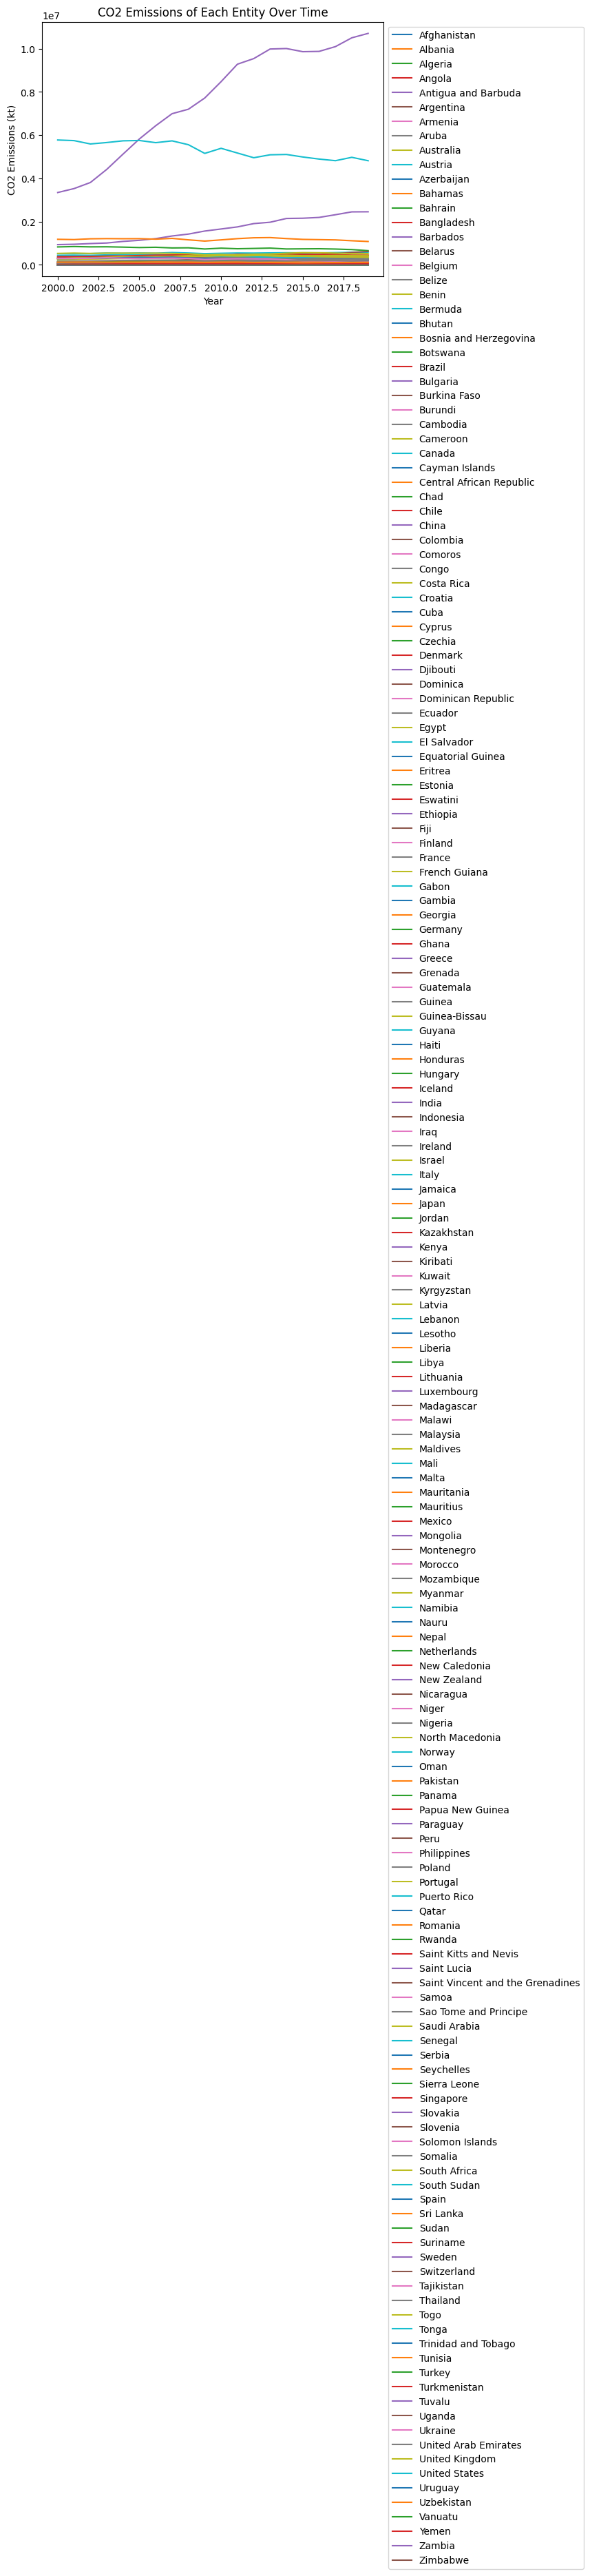

In [ ]:
# Filter out the columns needed for the plot
co2_emission_data = data[['Entity', 'Year', 'Value_co2_emissions_kt_by_country']]

# Convert 'Year' column to integers
co2_emission_data['Year'] = co2_emission_data['Year'].astype(int)

# Iterate over unique entities to create separate plots for each
for entity in co2_emission_data['Entity'].unique():
    entity_data = co2_emission_data[co2_emission_data['Entity'] == entity]

    plt.plot(entity_data['Year'], entity_data['Value_co2_emissions_kt_by_country'],
             label=entity)

# Add labels and title
plt.title('CO2 Emissions of Each Entity Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = data[data['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=filtered_df[column_name].min(),  # Fix the typo here
            zmax=filtered_df[column_name].max(),  # Fix the typo here
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)


In [ ]:
# Filtering numerical data
numeric_data = data.select_dtypes(include='number')
# print(numeric_data)
# Filtering categorical data
categorical_data = data.select_dtypes(exclude='number')
print(categorical_data)

           Entity Density\n(P/Km2) Land Area(Km2)
0     Afghanistan               60       6,52,230
1     Afghanistan               60       6,52,230
2     Afghanistan               60       6,52,230
3     Afghanistan               60       6,52,230
4     Afghanistan               60       6,52,230
...           ...              ...            ...
3644     Zimbabwe               38       3,90,757
3645     Zimbabwe               38       3,90,757
3646     Zimbabwe               38       3,90,757
3647     Zimbabwe               38       3,90,757
3648     Zimbabwe               38       3,90,757

[3649 rows x 3 columns]


In [ ]:
def clean_dataset(df):
    cleaned_df = df.copy()
    for column in cleaned_df.columns:
        if cleaned_df[column].dtype == 'object':  # Check if column is of object type (string)
            cleaned_df[column] = cleaned_df[column].str.replace('[^\w\s]','')  # Remove special characters
            cleaned_df[column] = cleaned_df[column].str.replace(',','')  # Remove commas
            cleaned_df[column] = cleaned_df[column].str.replace('(','')  # Remove opening brackets
            cleaned_df[column] = cleaned_df[column].str.replace(')','')  # Remove closing brackets
    return cleaned_df

# Assuming 'data' is your DataFrame containing the dataset
cleaned_data = clean_dataset(data)

# View the cleaned dataset
print(cleaned_data)


           Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3          

In [ ]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [ ]:
data['Latitude'].isnull().sum()

1

In [ ]:
print(data.loc[data['Latitude'].isnull(), 'Entity'].unique())

['French Guiana']


In [ ]:
data.dropna(subset=['Latitude'], inplace=True)

In [ ]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                9
Access to clean fuels for cooking                                    168
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2088
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          206
Value_co2_emissions_kt_by_country                  

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage = missing_percentage.round(2)

# Display the missing percentage for each column
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Entity                                                               0.00
Year                                                                 0.00
Access to electricity (% of population)                              0.25
Access to clean fuels for cooking                                    4.61
Renewable-electricity-generating-capacity-per-capita                25.52
Financial flows to developing countries (US $)                      57.24
Renewable energy share in the total final energy consumption (%)     5.32
Electricity from fossil fuels (TWh)                                  0.58
Electricity from nuclear (TWh)                                       3.45
Electricity from renewables (TWh)                                    0.58
Low-carbon electricity (% electricity)                               1.15
Primary energy consumption per capita (kWh/person)                   0.00
Energy intensity level of primary energy (MJ/$2017 PPP GDP)        

In [ ]:
# Drop the specified columns
new_data = data.drop(columns = ['Renewable-electricity-generating-capacity-per-capita',
                   'Financial flows to developing countries (US $)',
                   'Renewables (% equivalent primary energy)'])

# Display the updated DataFrame
new_data


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


In [ ]:
# Calculate the percentage of missing values in each column of new_data
missing_percentage_new_data = (new_data.isnull().sum() / len(new_data)) * 100
missing_percentage_new_data = missing_percentage_new_data.round(2)

# Display the missing percentage for each column in new_data
print("Percentage of missing values in each column of new_data:")
print(missing_percentage_new_data)

Percentage of missing values in each column of new_data:
Entity                                                               0.00
Year                                                                 0.00
Access to electricity (% of population)                              0.25
Access to clean fuels for cooking                                    4.61
Renewable energy share in the total final energy consumption (%)     5.32
Electricity from fossil fuels (TWh)                                  0.58
Electricity from nuclear (TWh)                                       3.45
Electricity from renewables (TWh)                                    0.58
Low-carbon electricity (% electricity)                               1.15
Primary energy consumption per capita (kWh/person)                   0.00
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.65
Value_co2_emissions_kt_by_country                                   11.71
gdp_growth                                             

In [ ]:
# Assuming you've already loaded the data into 'data' DataFrame

# Split the dataset into multiple DataFrames based on different entities
split_data = {}
for entity, group in new_data.groupby('Entity'):
    split_data[entity] = group

In [ ]:
for entity, df in split_data.items():
    if df['Access to clean fuels for cooking'].isnull().sum() < 5:
        # Calculate the mean excluding missing values
        mean_value = df['Access to clean fuels for cooking'].mean(skipna=True)
        # Fill missing values with the calculated mean
        df['Access to clean fuels for cooking'].fillna(mean_value, inplace=True)

In [ ]:
for entity, df in split_data.items():
    if df['Renewable energy share in the total final energy consumption (%)'].isnull().sum() < 5:
        # Calculate the mean excluding missing values
        mean_value = df['Renewable energy share in the total final energy consumption (%)'].mean(skipna=True)
        # Fill missing values with the calculated mean
        df['Renewable energy share in the total final energy consumption (%)'].fillna(mean_value, inplace=True)

In [ ]:
for entity, df in split_data.items():
    if df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].isnull().sum() < 7:
        # Calculate the mean excluding missing values
        mean_value = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean(skipna=True)
        # Fill missing values with the calculated mean
        df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(mean_value, inplace=True)

In [ ]:
for entity, df in split_data.items():
    if df['Value_co2_emissions_kt_by_country'].isnull().sum() < 5:
        # Calculate the mean excluding missing values
        mean_value = df['Value_co2_emissions_kt_by_country'].mean(skipna=True)
        # Fill missing values with the calculated mean
        df['Value_co2_emissions_kt_by_country'].fillna(mean_value, inplace=True)

In [ ]:
for entity, df in split_data.items():
    # Fill missing values in the 'Electricity from fossil fuels (TWh)' column with 0
    df['Electricity from fossil fuels (TWh)'].fillna(0, inplace=True)

In [ ]:
for entity, df in split_data.items():
    # Fill missing values in the 'Electricity from fossil fuels (TWh)' column with 0
    df['Electricity from nuclear (TWh)'].fillna(0, inplace=True)

In [ ]:
for entity, df in split_data.items():
    # Fill missing values in the 'Electricity from fossil fuels (TWh)' column with 0
    df['Electricity from renewables (TWh)'].fillna(0, inplace=True)

In [ ]:
# Iterate over each entity's DataFrame and impute missing values using KNN
for entity, df in split_data.items():
    # Extract numerical features for imputation
    features = df[['gdp_growth']].values

    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

    # Fit and transform the imputer on the features
    imputed_features = imputer.fit_transform(features)

    # Update the DataFrame with imputed values
    df['gdp_growth'] = imputed_features

In [ ]:
for entity, df in split_data.items():
    # Check if 'gdp_per_capita' column exists in the DataFrame
    if 'gdp_per_capita' in df.columns:
        # Interpolate missing values in 'gdp_per_capita' column
        df['gdp_per_capita'].interpolate(method='linear', inplace=True)
    else:
        print(f"'gdp_per_capita' column not found in {entity} DataFrame")

In [ ]:
# Concatenate all entities' DataFrames into a single DataFrame
merged_data = pd.concat(split_data.values())

merged_data.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               9
Access to clean fuels for cooking                                   168
Renewable energy share in the total final energy consumption (%)     21
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          21
Value_co2_emissions_kt_by_country                                   252
gdp_growth                                                          231
gdp_per_capita                                                  

In [ ]:
imputed_data = merged_data.copy()

# Define columns with missing values
columns_with_missing = imputed_data.columns[imputed_data.isnull().any()]

# Impute missing values using interpolation (linear method)
imputed_data.interpolate(method='linear', inplace=True)
# Check for any remaining missing values after imputation


# Impute missing values using SimpleImputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
imputed_data[columns_with_missing] = mean_imputer.fit_transform(imputed_data[columns_with_missing])

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data[columns_with_missing] = knn_imputer.fit_transform(imputed_data[columns_with_missing])

imputed_data.isnull().sum()


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

<ipython-input-168-5b1584049cdd>:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



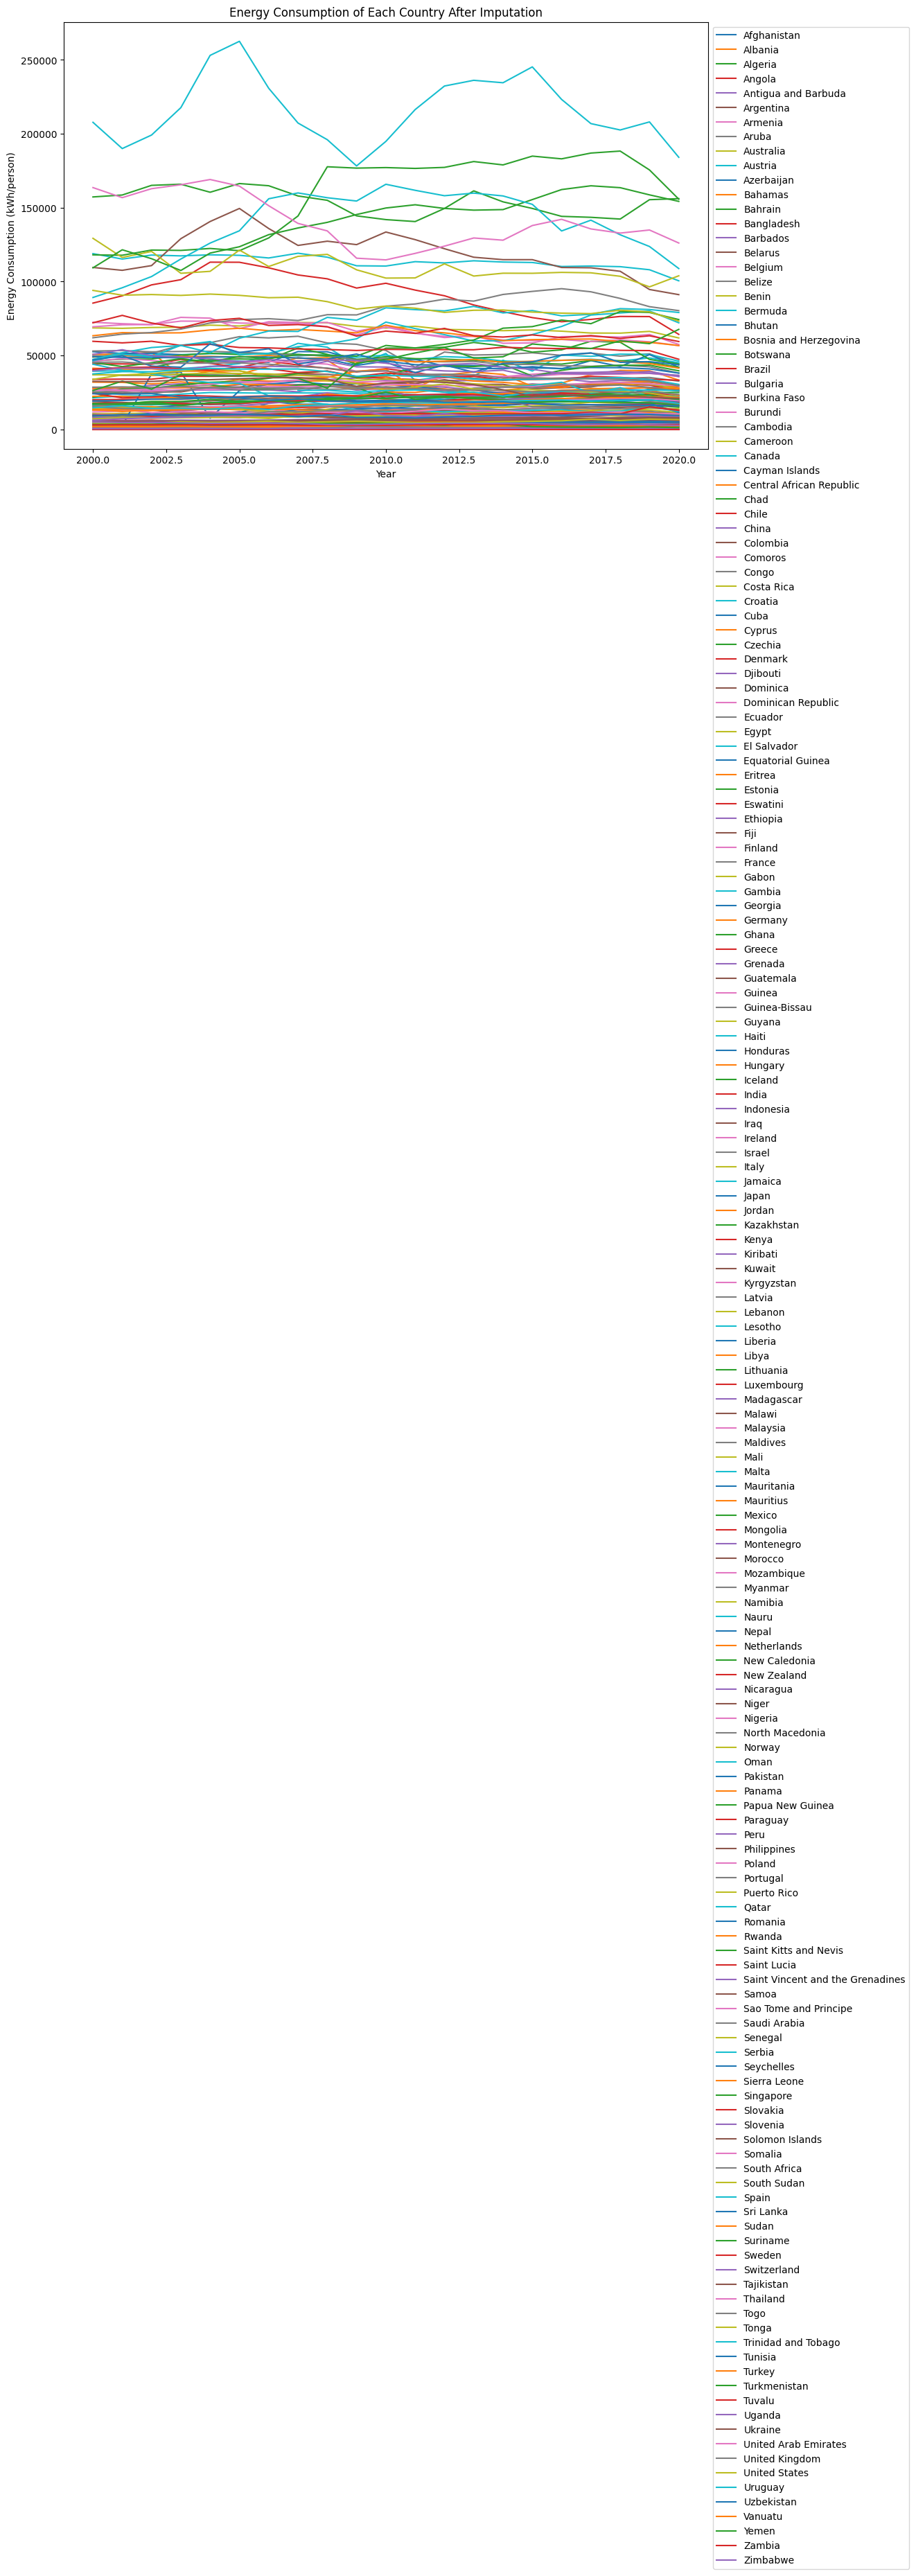

In [ ]:
# Group the data by 'Entity' (country) and 'Year'
grouped_data = imputed_data.groupby(['Entity', 'Year'])['Primary energy consumption per capita (kWh/person)'].mean().reset_index()

# Plot energy consumption for each country
plt.figure(figsize=(12, 8))
for country in grouped_data['Entity'].unique():
    country_data = grouped_data[grouped_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Primary energy consumption per capita (kWh/person)'], label=country)

# Add labels and title
plt.title('Energy Consumption of Each Country After Imputation')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (kWh/person)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<ipython-input-169-cd2c77d1a71b>:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



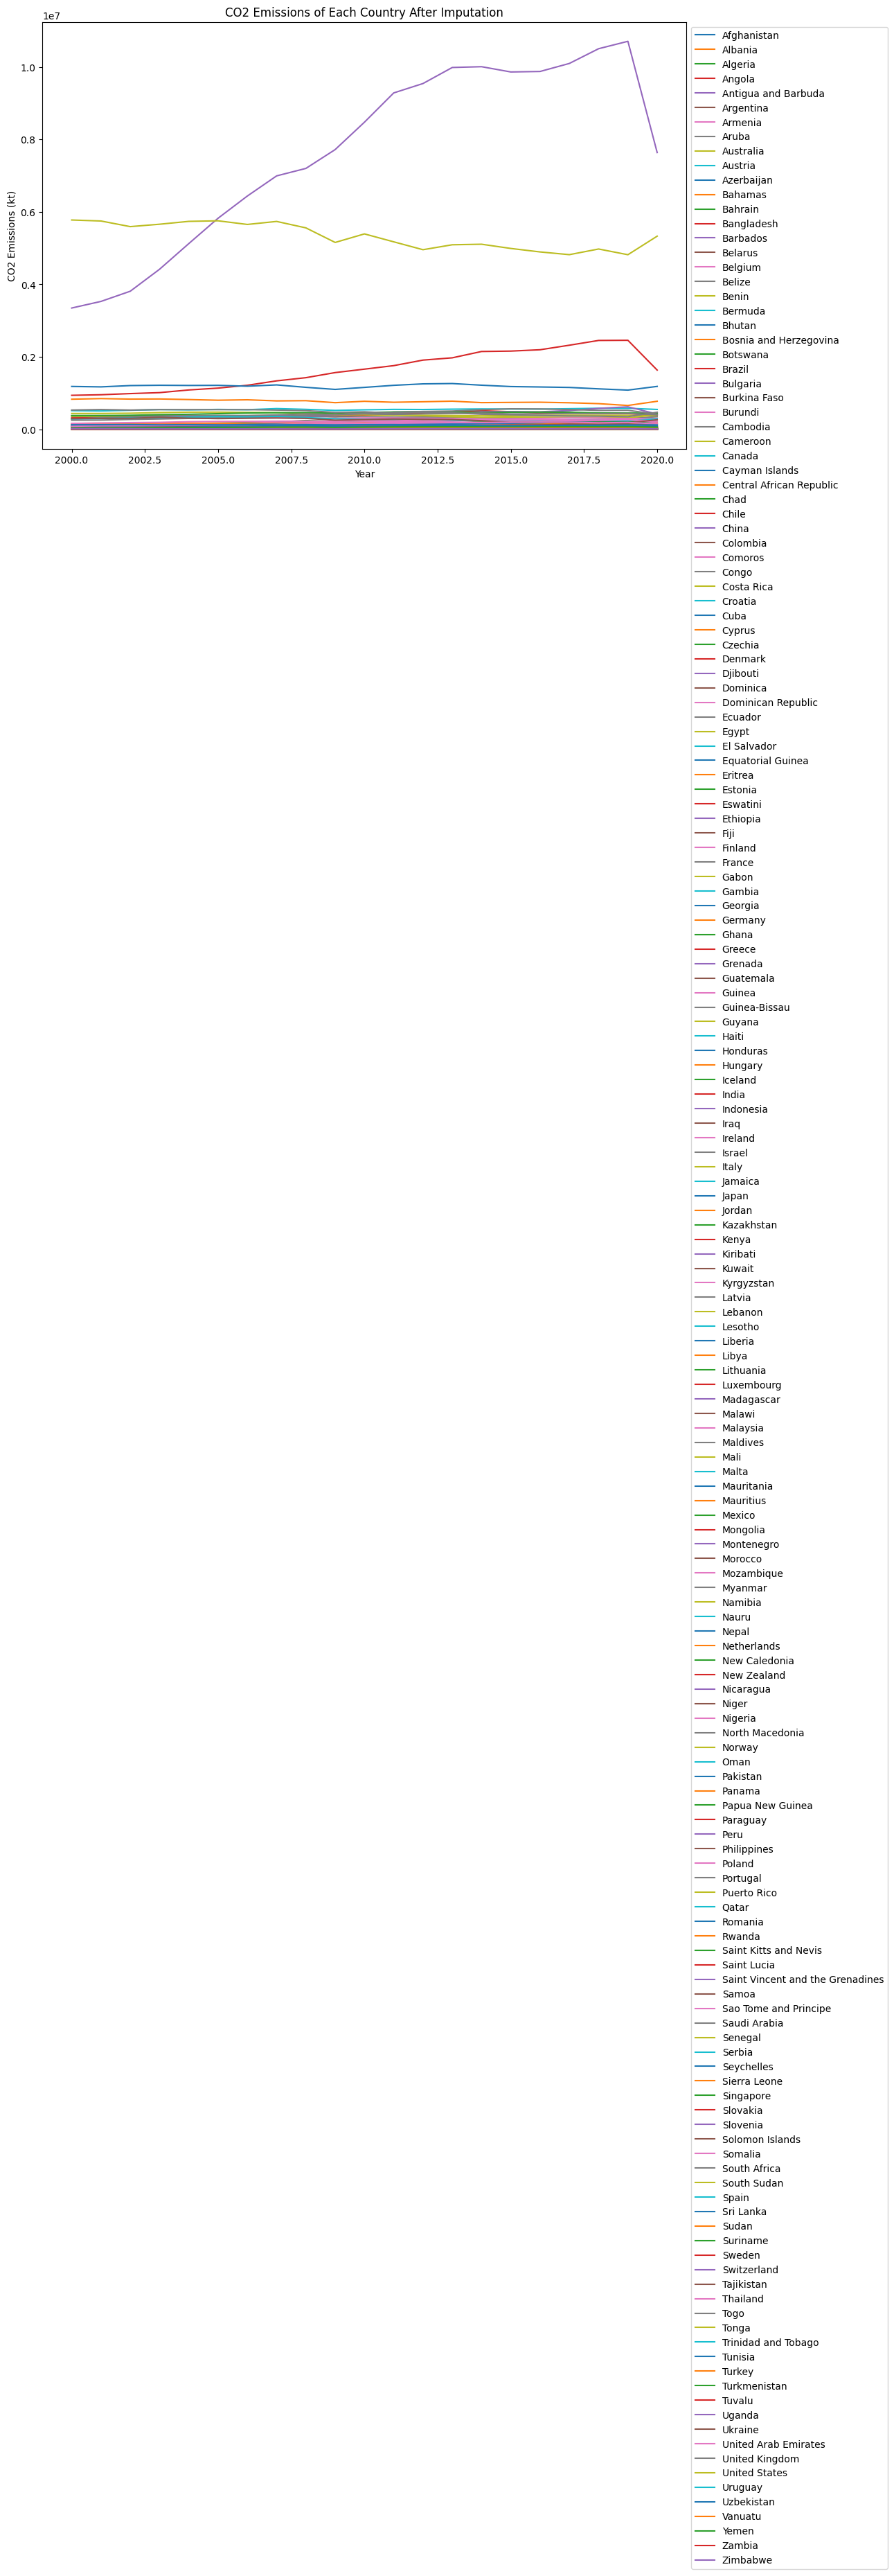

In [ ]:
# Group the data by 'Entity' (country) and 'Year'
grouped_data = imputed_data.groupby(['Entity', 'Year'])['Value_co2_emissions_kt_by_country'].mean().reset_index()

# Plot CO2 emissions for each country
plt.figure(figsize=(12, 8))
for country in grouped_data['Entity'].unique():
    country_data = grouped_data[grouped_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=country)

# Add labels and title
plt.title('CO2 Emissions of Each Country After Imputation')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# Check for duplicated rows in the new dataset
duplicated_rows = new_data[new_data.duplicated()]

# Print the duplicated rows, if any
if not duplicated_rows.empty:
    print("Duplicated Rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")

No duplicated rows found.


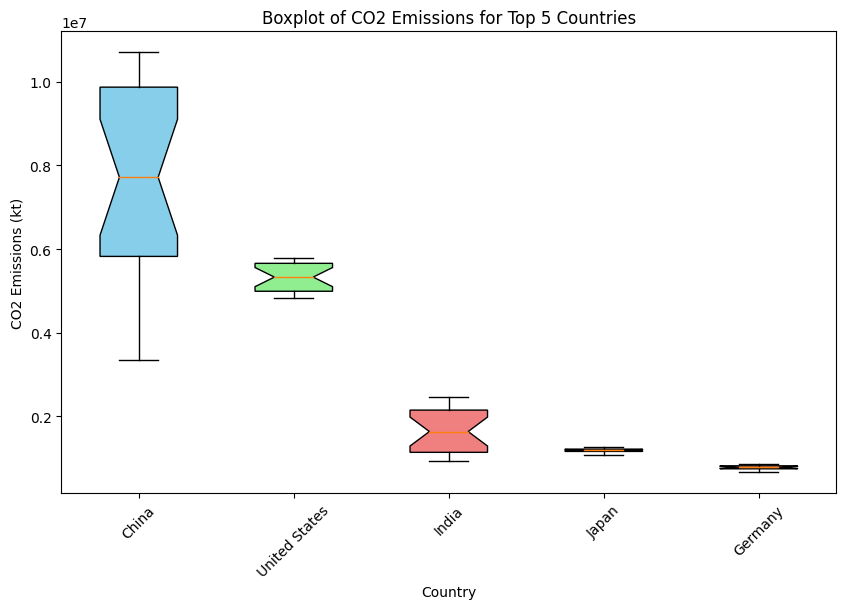

In [ ]:
# Group the data by 'Entity' (country) and calculate the total CO2 emissions
co2_emissions_by_country = imputed_data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()

# Get the top 5 countries with the highest CO2 emissions
top_5_countries = co2_emissions_by_country.nlargest(5).index

# Filter the data for the top 5 countries
top_5_data = imputed_data[imputed_data['Entity'].isin(top_5_countries)]

# Define custom colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon']

# Create a boxplot to check for outliers
plt.figure(figsize=(10, 6))
plt.title('Boxplot of CO2 Emissions for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)

# Plot boxplots with custom colors
boxplot = plt.boxplot([top_5_data[top_5_data['Entity'] == country]['Value_co2_emissions_kt_by_country'] for country in top_5_countries],
                      labels=top_5_countries,
                      patch_artist=True,  # Enable fill color
                      notch=True)  # Display notches for confidence intervals

# Set boxplot colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()



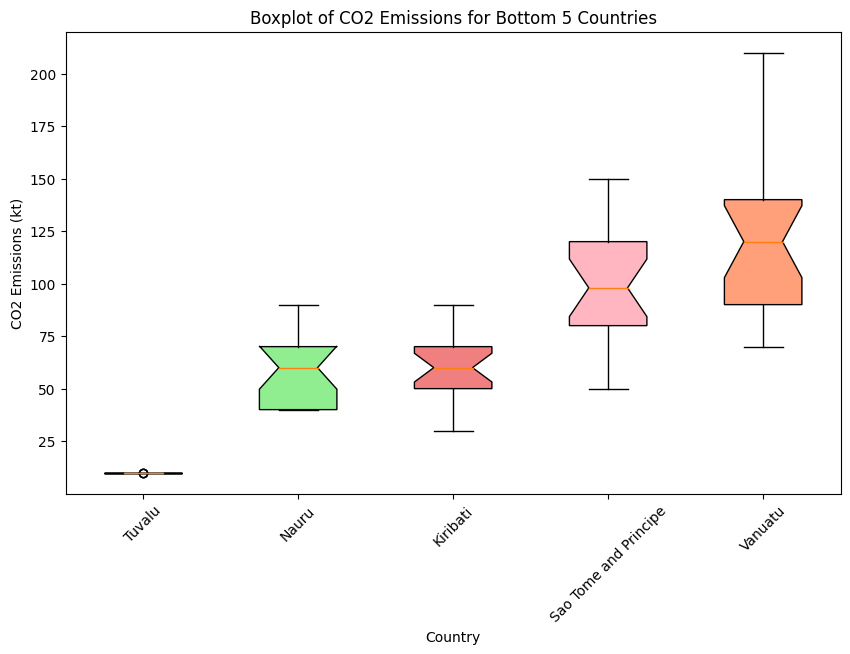

In [ ]:
# Group the data by 'Entity' (country) and calculate the total CO2 emissions
co2_emissions_by_country = imputed_data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()

# Get the bottom 5 countries with the lowest CO2 emissions
bottom_5_countries = co2_emissions_by_country.nsmallest(5).index

# Filter the data for the bottom 5 countries
bottom_5_data = imputed_data[imputed_data['Entity'].isin(bottom_5_countries)]

# Define custom colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon']

# Create a boxplot to check for outliers
plt.figure(figsize=(10, 6))
plt.title('Boxplot of CO2 Emissions for Bottom 5 Countries')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)

# Plot boxplots with custom colors
boxplot = plt.boxplot([bottom_5_data[bottom_5_data['Entity'] == country]['Value_co2_emissions_kt_by_country'] for country in bottom_5_countries],
                      labels=bottom_5_countries,
                      patch_artist=True,  # Enable fill color
                      notch=True)  # Display notches for confidence intervals

# Set boxplot colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()



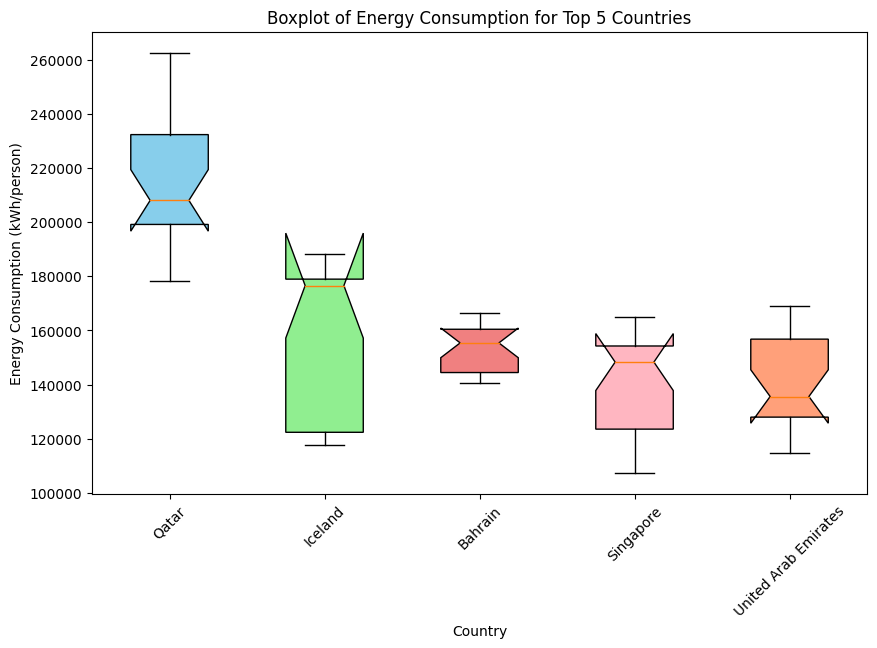

In [ ]:
# Group the data by 'Entity' (country) and calculate the mean energy consumption
energy_consumption_by_country = imputed_data.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean()

# Get the top 5 countries with the highest energy consumption
top_5_countries = energy_consumption_by_country.nlargest(5).index

# Filter the data for the top 5 countries
top_5_data = imputed_data[imputed_data['Entity'].isin(top_5_countries)]

# Define custom colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon']

# Create a boxplot to check for outliers
plt.figure(figsize=(10, 6))
plt.title('Boxplot of Energy Consumption for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Energy Consumption (kWh/person)')
plt.xticks(rotation=45)

# Plot boxplots with custom colors
boxplot = plt.boxplot([top_5_data[top_5_data['Entity'] == country]['Primary energy consumption per capita (kWh/person)'] for country in top_5_countries],
                      labels=top_5_countries,
                      patch_artist=True,  # Enable fill color
                      notch=True)  # Display notches for confidence intervals

# Set boxplot colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()


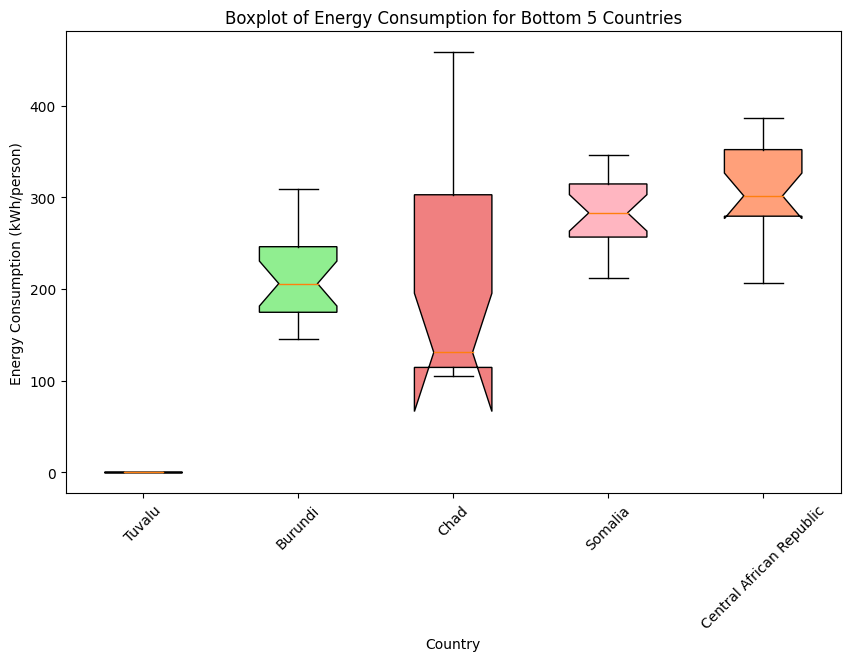

In [ ]:
# Group the data by 'Entity' (country) and calculate the mean energy consumption
energy_consumption_by_country = imputed_data.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean()

# Get the bottom 5 countries with the lowest energy consumption
bottom_5_countries = energy_consumption_by_country.nsmallest(5).index

# Filter the data for the bottom 5 countries
bottom_5_data = imputed_data[imputed_data['Entity'].isin(bottom_5_countries)]

# Define custom colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon']

# Create a boxplot to check for outliers
plt.figure(figsize=(10, 6))
plt.title('Boxplot of Energy Consumption for Bottom 5 Countries')
plt.xlabel('Country')
plt.ylabel('Energy Consumption (kWh/person)')
plt.xticks(rotation=45)

# Plot boxplots with custom colors
boxplot = plt.boxplot([bottom_5_data[bottom_5_data['Entity'] == country]['Primary energy consumption per capita (kWh/person)'] for country in bottom_5_countries],
                      labels=bottom_5_countries,
                      patch_artist=True,  # Enable fill color
                      notch=True)  # Display notches for confidence intervals

# Set boxplot colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()


In [ ]:
imputed_data.to_csv('imputed_data.csv', index=False)

print("CSV file 'imputed_data.csv' has been saved successfully.")

In [ ]:
merged_data.dtypes

In [ ]:
# Compute the correlation matrix
correlation_matrix = merged_data.corr()
correlation_matrix

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
